# Import the nessecary packages

In [2]:
import numpy as np
from scipy.integrate import quad
from matplotlib import pyplot as plt 

# Gram Schmidt Orthogonalization Algorithem for polynoimals

inner product is defined as the dot product of the coefficients of the polynomials
https://math.stackexchange.com/questions/2412804/examples-of-inner-products-on-a-polynomial-vector-space



Before we go on the the Gram Schmidt Orthogonalization Algorithem for polynomials 
We need to define the inner product as so

$$<h_1, h_j> = \int_a^b h_i(t)h_j(t)w(t)dt$$

In this case a polynomial would be represented as a numpy array in which P[i] is the ith coefficient to the polynoimal. 

This if I have a polynoimal $a_0 + a_1x + a_2x^2 + a_3x^3$ it would be represented as $[a_0,a_1,a_2,a_3]$

https://zerobone.net/blog/cs/gram-schmidt-orthogonalization/

# First we need to define a polynomial function in the form of a numpy array

In [3]:
# p is a numpy array
# x is a numpy array
# we need to return an array such that the ith index is equal to p(x_i) 
def p_of_x(p):
    def the_function(x):
        ret = np.array([(p[i]) * (x**i) for i in range(len(p))])
        return np.sum(ret,axis = 0)
    return the_function


# The zero function is needed 
def zero_function(x):
    return 0*x
def one_function(x):
    return 1

def function_scale(c,f_2):
    def the_function(x):
        return f_1(x) * c
    return the_function


def function_mult(f_1,f_2):
    def the_function(x):
        return f_1(x) * f_2(x)
    return the_function

def function_invert(f_2):
    def the_function(x):
        return 1 / f_2(x)
    return the_function


def function_add(f_1,f_2):
    def the_function(x):
        return f_1(x) + f_2(x)
    return the_function

def function_composition(f_1,f_2):
    def the_function(x):
        return f_1(f_2(x))
    return the_function

# Secondly we need find the integral of the polynomials

In [4]:
def my_function(x):
    return x**2

result, error = quad(my_function, 0, 1)
print(result)

0.3333333333333333


In [5]:
result, error = quad(p_of_x(np.array([1])), 0, 1)
print(result)

1.0


In [91]:



def plot_function(f,a,b):
    x = np.linspace(a,b) 
    y = f(x)
    plt.title("Matplotlib demo {function}".format(function = f)) 
    plt.xlabel("x axis caption") 
    plt.ylabel("y axis caption") 
    plt.plot(x,y) 
    plt.show()

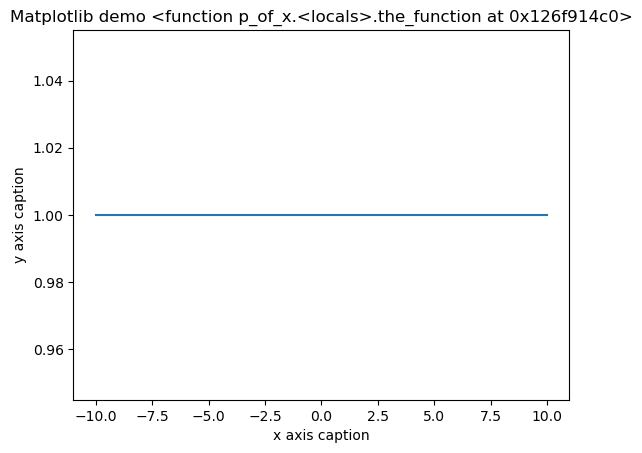

In [92]:
plot_function(p_of_x(np.array([1])),-10,10)

0.5


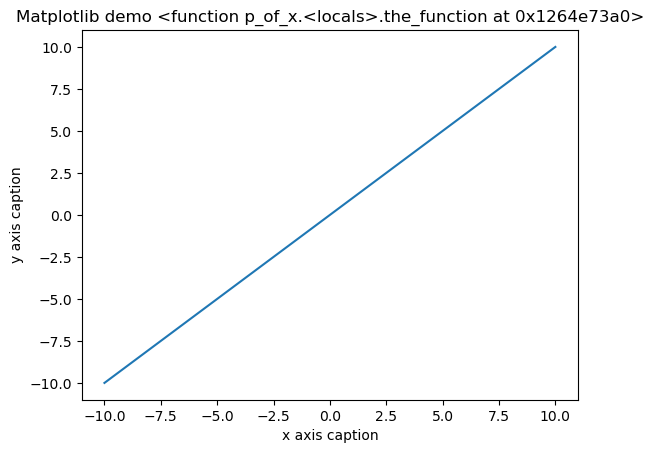

In [11]:
f = p_of_x(np.array([0,1]))
result, error = quad(f, 0, 1)
print(result)
plot_function(f,-10,10)

0.3333333333333333


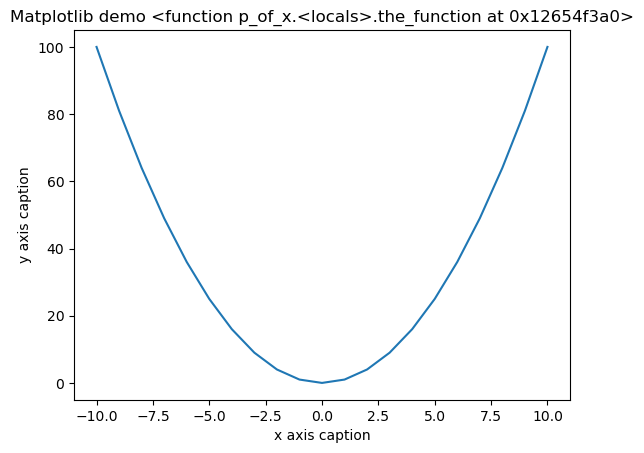

In [12]:
f = p_of_x(np.array([0,0,1]))
result, error = quad(f, 0, 1)
print(result)
plot_function(f,-10,10)

0.25


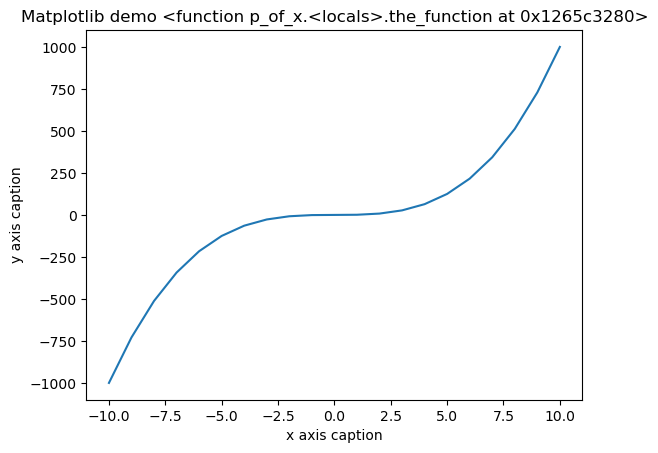

In [13]:
f = p_of_x(np.array([0,0,0,1]))
result, error = quad(f, 0, 1)
print(result)
plot_function(f,-10,10)

0.41666666666666674


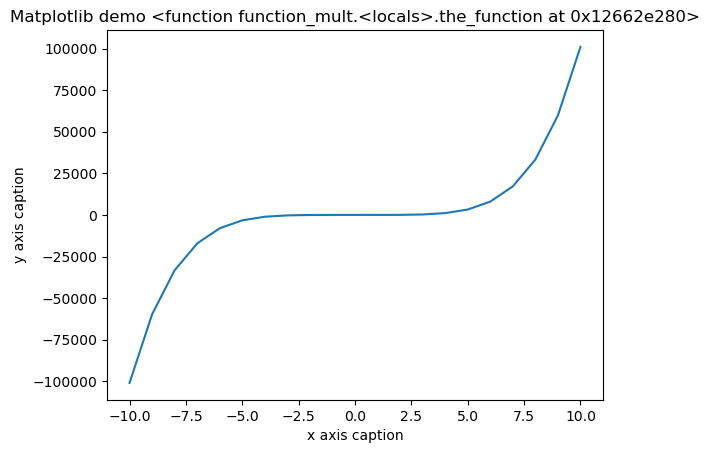

In [14]:
f = function_mult(p_of_x(np.array([0,1,0,1])) , p_of_x(np.array([0,0,1])))
result, error = quad(f, 0, 1)
print(result)
plot_function(f,-10,10)

# Gram Schmidt algorithem

In [15]:
def gram_schmidt(vectors):
    result = []
    for v in vectors:
        v = v / np.norm(v, v)
        w = v - sum(np.dot(v, u)  * u for u in result)
        if (w > 1e-10).any():
            result.append(w)
    return result

In [16]:
# p1 and p2 are polynoimals represented in as numpy arrays. The ith element in the list is the ith coefficient of the polynomial under the basis
# Since integrals are 
def inner_product(p1,p2,w):
    h_1 = p_of_x(p1)
    h_2 = p_of_x(p2)
    return inner_product_functions(h_1,h_2,w)
def inner_product_functions(f1,f2,w):
    f = function_mult(w,function_mult(f1,f2))
    result, error = quad(f, 0, 1)
    return result
def poly_norm(p, w):
    return np.sqrt(inner_product(p,p,w))

def chebyshev(x):
    return 1 / np.sqrt(1 - x ** 2)

In [17]:
def gram_schmidt_polynomial(vectors):
    result = []
    for v in vectors:
        w = v - sum((inner_product(v, u, chebyshev) * u) / inner_product(u, u, chebyshev) for u in result)
        if (w > 1e-10).any():
            result.append(w)
    return result

In [18]:
A = gram_schmidt_polynomial(np.array([[1,0,0],[0,1,0],[0,0,1]]))
A

[array([1, 0, 0]),
 array([-0.63661977,  1.        ,  0.        ]),
 array([ 0.21316335, -1.12023437,  1.        ])]

In [19]:
inner_product(A[0],A[1],chebyshev)


-1.463732377564193e-14

In [20]:
inner_product(A[1],A[2],chebyshev)

3.099931693466569e-15

In [21]:
inner_product(A[2],A[0],chebyshev)

1.0469680309461386e-14

https://www.youtube.com/watch?v=7R-x8_C81-A

https://www.youtube.com/watch?v=nQZYBWB6q_k&list=PLlXfTHzgMRULZfrNCrrJ7xDcTjGr633mm&index=19



Gaussian Quadrature

$$f(t) = \sum_{i = 0}^{\infty} \alpha_i h_i(t)$$
$$a_i = \frac{\langle f,h_i \rangle}{\langle h_i, h_i \rangle}$$

The next issue is how to calculate $\langle f,h_i \rangle$. One way it is to use the rectangles

In [36]:
# if dec is 0 return a if dec is 1 return b
# if dec is a decemal number renurn the valid interpolation between a and b
def interpolate(a,b,dec):
    return a * (1 - dec) + b  * dec

In [37]:
def plot_interpolate(a,b):
    x = np.linspace(0,1)
    y = interpolate(a,b,x)
    plt.title("Matplotlib demo {function}".format(function = f)) 
    plt.xlabel("x axis caption") 
    plt.ylabel("y axis caption") 
    plt.plot(x,y) 
    plt.show()

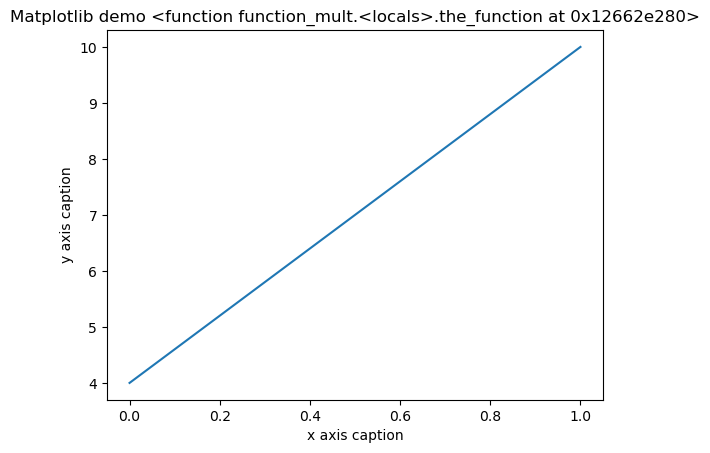

In [38]:
plot_interpolate(4,10)

In [39]:
# In this case I am going to assume that all points in the list f are evenlly spaced points within 0 and 1

# Firstly I need to turn f into a continuouse step function
# f_step takes in an array and reutrns a function with the domain from [0,1]
# more points in the 
def f_step(f):
    max_ind = len(f) - 1
    # print(f_size)
    def f_fun(x):
        arr_1 = (np.floor(max_ind * x).astype(int))
        arr_2 = (np.ceil(max_ind * x).astype(int))
        weight = max_ind * x - np.floor(max_ind * x)
        # print(arr)
        return interpolate(f[arr_1],f[arr_2],weight)
    return f_fun


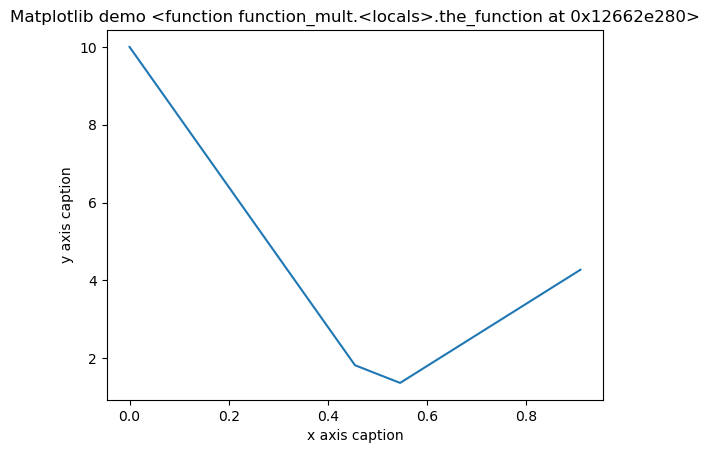

In [71]:
a = np.linspace(0,1)
b = np.array([10,1,5])
x = np.arange(0,1,1/11)
y = f_step(b)(x)
plt.title("Matplotlib demo {function}".format(function = f)) 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()

In [72]:
result, error = quad(f_step(b), 0, 1)
result

4.25

This code here is meant to calculate $a_i$

In [73]:
def a(f1,poly,w):
    return inner_product_functions(f1,poly,w)/inner_product_functions(poly,poly,w)

In [85]:
A = gram_schmidt_polynomial(np.eye(40))

/var/folders/g8/htk5l_1952g9hfp5xgbd02k80000gn/T/ipykernel_35666/3690217276.py:9: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, error = quad(f, 0, 1)


[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]),
 array([-0.63661977,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 array([ 0.21316335, -1.12023437,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         

Approximating a polynomial from a set of points
https://math.stackexchange.com/questions/1839499/approximate-a-function-from-points

In [87]:
fun_list = [p_of_x(i_1) for i_1 in A]
[a(f_step(b),fun_list_ele,chebyshev) for fun_list_ele in fun_list]

/var/folders/g8/htk5l_1952g9hfp5xgbd02k80000gn/T/ipykernel_35666/3690217276.py:9: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, error = quad(f, 0, 1)


[4.208728711680296,
 -2.4297386830160352,
 22.764751689678853,
 -7.349686925524682,
 -75.0814475665646,
 48.19385575357969,
 522.456928126116,
 -423.7164298001805,
 -3876.6294612918737,
 -327.69332544587843,
 -134.8801011178434,
 -90.67577697389925,
 -101.04151431912551,
 214.95379347616986,
 190.90457666446312,
 22.867685318523552,
 10.455390955858539,
 6.051378601084378,
 3.927485436017352,
 2.7395078773165413,
 2.0110391472994333,
 1.5345849378164302,
 1.207438785362655,
 0.9741600342018956,
 0.8021975675980697,
 0.6723677594047099,
 0.5720735542731278,
 0.4931051776135578,
 0.42988782117991564,
 0.37853635260813634,
 0.33628107228797555,
 0.30110756539939004,
 0.27152443055396724,
 0.24640973214106845,
 0.2249072343639802,
 0.20635490842222126,
 0.19023475325866213,
 0.17613699711718278,
 0.1637338359790153,
 0.15276396207681628]

In [88]:
f_step(b)

<function __main__.f_step.<locals>.f_fun(x)>

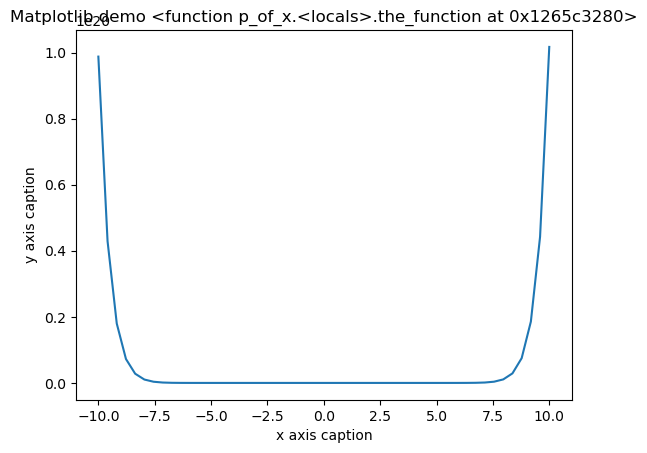

In [93]:
plot_function(fun_list[20],-10,10)

In [105]:
for a in fun_list:
    for b in fun_list:
        print(inner_product_functions(a,b,chebyshev))

1.5707963267948666
-1.463732377564193e-14
1.0469680309461386e-14
-5.796119029159135e-15
2.774014724860475e-15
-8.735862166140793e-15
2.2700739606194817e-14
-2.0666006181046003e-14
-4.391793735449557e-12
1.747725952333127e-12
3.153991960396564e-12
3.9446880639626326e-12
2.0730888938730944e-12
-2.4639770684793923e-12
-6.757861145819842e-13
-9.478599915810432e-12
-2.6583724922659826e-11
-4.237682798419368e-11
-6.296514647658535e-11
-1.5090203501618568e-10
-1.4553159454012305e-10
-1.6260923716869929e-10
-2.41709257468719e-10
-2.835856550331232e-10
-3.473399224983228e-10
-4.600621454421197e-10
-4.790476493587411e-10
-7.52101454048038e-10
-6.337921969871805e-10
-7.317210634308375e-10
-8.310309770069966e-10
-9.449347313821677e-10
-1.0521236848915118e-09
-1.0786619416048382e-09
-1.2556684912048582e-09
-1.313947799582191e-09
-1.431426024366825e-09
-1.5940224211501525e-09
-1.75969866269486e-09
-1.8324727671358992e-09
-1.463732377564193e-14
0.14877839102986343
3.099931693466569e-15
-2.84479269333

-0.000175982991363138
-0.000190090169702542
-0.0002045108353273461
-0.00021921700172179427
3.153991960396564e-12
-4.1062134994708315e-13
4.298729696932266e-13
-6.038263333319302e-12
-2.5182823569533903e-12
-1.1329492835211191e-10
-7.716468477570076e-10
-1.5655471528939516e-08
1.9205374490054656e-08
2.364755048185197e-07
5.808013961960991e-07
8.679608418262051e-07
7.633060636054234e-07
-3.235434606497354e-07
-4.15570165492861e-07
-3.534723268987574e-06
-7.759901659904844e-06
-1.3432752397308591e-05
-2.0724719643544368e-05
-2.9743844948144847e-05
-4.055448269116693e-05
-5.318639144633728e-05
-6.7641380282677e-05
-8.388781793300925e-05
-0.00010191998101355624
-0.00012165270377988256
-0.00014303469863318705
-0.00016599626591064072
-0.00019046276381590055
-0.0002163565491506063
-0.00024359853770940262
-0.0002721094447967148
-0.0003018107525177602
-0.00033262545597073125
-0.00036447862064952836
-0.0003972977985693581
-0.0004310133267338939
-0.0004655585940537075
-0.0005008713164516542
-0.000

-3.906935746388703e-05
1.664838749988283e-05
2.130368468203243e-05
0.0001813249188386976
0.0003981968134449616
0.0006894520375240795
0.0010639088527108686
0.0015271324949278256
0.002082443237645844
0.0027313828425310463
0.003474052528624082
0.004308843744022006
0.00523546012985072
0.006249538939967044
0.00734844662757849
0.008528604611505074
0.009786179200957118
0.011117181335724431
0.012517547076845029
0.013983201426309792
0.01551010819667719
0.017094308436506882
0.01873194921750372
0.020419305095108035
0.022152793475609365
0.023928988465036972
0.025744686055902164
0.02759636546462668
-1.4553159454012305e-10
-6.5347597314163e-12
8.661889897553078e-12
-2.4078639699165216e-11
2.9884287643047595e-11
7.51274560865096e-09
4.924625549079609e-08
9.295352256547598e-07
-1.3506285871049888e-06
-1.6546124389553447e-05
-4.055448269116693e-05
-6.05910135178742e-05
-5.322641522577615e-05
2.274205411903629e-05
2.9027462996077965e-05
0.00024717872132840903
0.0005428992327870574
0.0009400728947584732


0.007743631120267932
0.011117181335724431
0.015161788569374774
0.0198887325275315
0.025298793917847284
0.031380290341570125
0.03813109293648124
0.045519441095537
0.053526165550116855
0.062125206798350895
0.07128864121379926
0.08098740969943549
0.09119190347465626
0.10187243053032506
0.11299957865590067
0.12454449661249083
0.1364791038619227
0.14877624744258683
0.16140981424261303
0.17435483196161422
0.18758794459290032
0.20108348785922103
-8.310309770069966e-10
-1.0691914257628362e-11
5.2774250198230234e-11
-1.4507677817830294e-10
1.8251712790779596e-10
4.601247071712152e-08
3.033061599484599e-07
5.759356282926801e-06
-8.12291595256187e-06
-9.94507655110665e-05
-0.00024359853770940262
-0.0003636210623655806
-0.0003187799075710055
0.00013756072317581787
0.00017396836465960848
0.0014839114537747314
0.003261155621265288
0.005648751506367365
0.0087189851121828
0.012517547076845029
0.0170717304324597
0.02239423941136913
0.028485956060399217
0.035333728749886856
0.04293516211057375
0.0512544

0.019221151804322635
0.02759636546462668
0.037637906500074925
0.0493738368043643
0.06280614596089255
0.0779058755390303
0.09466777010820172
0.11301301040114348
0.1328940230841038
0.15424612345406807
0.17699999273932346
0.20108348785922103
0.22642309675898117
0.25294509609633137
0.28057645520883545
0.3092455329356223
0.3388825993714357
0.3694202260838319
0.4007935648592683
0.4329405990844284
0.46580332362020865
0.4993180043601255


In [104]:
blyat(k[0],k[1])

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12],
       [ 0,  4,  8, 12, 16]])

In [101]:
k[0]

array([[0],
       [1],
       [2],
       [3],
       [4]])